
# Import libraries

In [2]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

import xarray as xr
print('xarray: %s' % xr.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)


# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version


# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

# Other utilities
import sys
import os


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek


from collections import Counter
from numpy import * 



# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
print(main_dir)

pandas: 1.3.5
xarray: 0.20.1
geopandas: 1.21.5
tensorflow: 2.0.0
Tensorflow/Keras: 2.2.4-tf
pandas: 1.3.5


Using TensorFlow backend.


sklearn: 1.0.2
plotly: 5.6.0
/Users/3rfanian/P_main


# DATA importing

In [3]:
test_set = pd.read_csv('data_with_newtarget/test_set_with_newtarget.csv')
validation_set = pd.read_csv('data_with_newtarget/validation_set_with_newtarget.csv')
traning_set = pd.read_csv('data_with_newtarget/traning_set_with_newtarget.csv')

#training with yestersay lsm
traning_df = traning_set['newlsm']
traning_df
ndf = traning_df.iloc[1:]
ndf.loc[4268771,] = 0.0
nd = ndf.reset_index()
del nd["index"]
nd =nd.rename(columns={'newlsm': 'Tomorrow_lsm'})
df2 = traning_set.assign(Tomorrow_lsm=nd)
del df2["Unnamed: 0"]

#validation with yestersay lsm
validation_df = validation_set['newlsm']
ndf_val = validation_df.iloc[1:]
ndf_val.loc[688402,] = 0.0
nd_val = ndf_val.reset_index()
del nd_val["index"]
nd_val =nd_val.rename(columns={'newlsm': 'Tomorrow_lsm'})
df3 = validation_set.assign(Tomorrow_lsm=nd_val)
del df3["Unnamed: 0"]


#test with yestersay lsm
test_df = test_set['newlsm']
ndf_test = test_df.iloc[1:]
ndf_test.loc[539487,] = 0.0
nd_test = ndf_test.reset_index()
del nd_test["index"]
nd_test =nd_test.rename(columns={'newlsm': 'Tomorrow_lsm'})
df4 = test_set.assign(Tomorrow_lsm=nd_test)
del df4["Unnamed: 0"]


training_set_wt = df2
validation_set_wt =df3
test_set_wt = df4


##### Step 2 - Split training data
x_training = training_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******training features******")
#print (x_training)
y_training = training_set_wt[['Tomorrow_lsm']]
print ("******training target******")
#print (y_training)

##### Step 3 - Split test data
x_test = test_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******test features******")
#print (x_test)
y_test = test_set_wt[['Tomorrow_lsm']]
print ("******test target******")
#print (y_test)

##### Step 4 - Split validation data
x_validation = validation_set_wt[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']]
print ("******validation features******")
#print (x_validation)
y_validation = validation_set_wt[['Tomorrow_lsm']]
print ("******validation target******")
#print (y_validation)

******training features******
******training target******
******test features******
******test target******
******validation features******
******validation target******


# SMOTETomek

In [4]:

print('Before SMOTETomek')

dff = y_training
M = y_training.to_numpy()
# summarize dataset
classes = unique(M)
print(classes)
total = len(M)
for c in classes:
    n_examples = len(M[M==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

smtmek = SMOTETomek(random_state=1)

X_training_smtmek, Y_traning_smtmek = smtmek.fit_resample(x_training, y_training)

print('After SMOTETomek')
dff = Y_traning_smtmek
M = Y_traning_smtmek.to_numpy()
# summarize dataset
classes = unique(M)
print(classes)
total = len(M)
for c in classes:
    n_examples = len(M[M==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

Before SMOTETomek
[0. 1.]
> Class=0 : 4254174/4268771 (99.7%)
> Class=1 : 14597/4268771 (0.3%)
After SMOTETomek
[0. 1.]
> Class=0 : 4254174/8508348 (50.0%)
> Class=1 : 4254174/8508348 (50.0%)


In [15]:
model_simple_SMOTETomek.save('ComModel_512n_SMOTETomek')
model_simple_SMOTETomek.save('ComModel_512n_SMOTETomek.h5')

2022-06-24 19:32:36.580043: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ComModel_512n_SMOTETomek/assets


In [8]:
##### Step 5 - Specify the structure of a Neural Network
model_simple_SMOTETomek = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_simple_SMOTETomek.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_simple_SMOTETomek.fit(X_training_smtmek, Y_traning_smtmek, epochs = 1 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
8508348/8508348 [==============================] - 1631s 192us/sample - loss: 0.4087 - accuracy: 0.8040 - val_loss: 0.3675 - val_accuracy: 0.8309


In [11]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTETomek_512n = (model_simple_SMOTETomek.predict(x_training))
# Predict class labels on a test data
pred_labels_te_simple_SMOTETomek_512n = (model_simple_SMOTETomek.predict(x_test))
#> 0.01).astype(int)


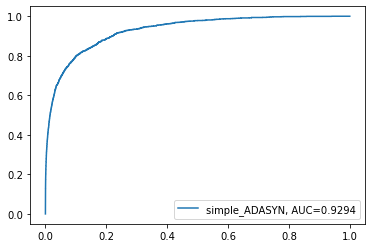

In [13]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple_SMOTETomek_512n)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple_SMOTETomek_512n), 4)
plt.plot(fpr,tpr,label="simple_ADASYN, AUC="+str(auc))





#add legend
plt.legend()

In [7]:
##### Step 5 - Specify the structure of a Neural Network
model_complex_SMOTETomek_4l_512n = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])
model_complex_SMOTETomek_4l_512n.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_complex_SMOTETomek_4l_512n.fit(X_training_smtmek, Y_traning_smtmek, epochs = 2 ,  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
Epoch 1/2
8508348/8508348 [==============================] - 4953s 582us/sample - loss: 0.4206 - accuracy: 0.7961 - val_loss: 0.4386 - val_accuracy: 0.8058
Epoch 2/2
8508348/8508348 [==============================] - 4443s 522us/sample - loss: 0.4119 - accuracy: 0.8019 - val_loss: 0.3850 - val_accuracy: 0.7710


In [8]:
model_complex_SMOTETomek_4l_512n.save('model_complex_SMOTETomek_4l_512n')
model_complex_SMOTETomek_4l_512n.save('model_complex_SMOTETomek_4l_512n.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2022-06-26 18:53:57.560453: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_complex_SMOTETomek_4l_512n/assets


In [9]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complex_SMOTETomek_4l_512n = (model_complex_SMOTETomek_4l_512n.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complex_SMOTETomek_4l_512n = (model_complex_SMOTETomek_4l_512n.predict(x_test))
#> 0.01).astype(int)


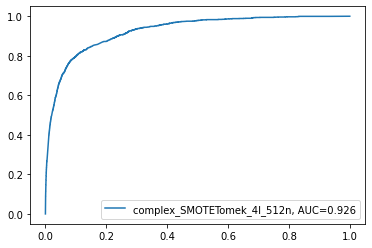

In [10]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complex_SMOTETomek_4l_512n)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complex_SMOTETomek_4l_512n), 4)
plt.plot(fpr,tpr,label="complex_SMOTETomek_4l_512n, AUC="+str(auc))





#add legend
plt.legend()

In [4]:
##### Step 5 - Specify the structure of a Neural Network
model_simple_SMOTETomek_1n_1l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(1, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpoint2'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model_simple_SMOTETomek_1n_1l.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_simple_SMOTETomek_1n_1l.fit(X_training_smtmek, Y_traning_smtmek, epochs = 25 ,callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


2022-07-06 18:21:10.794535: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-06 18:21:10.797721: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 8508348 samples, validate on 688402 samples
Epoch 1/25
8508348/8508348 [==============================] - 665s 78us/sample - loss: 0.6765 - accuracy: 0.5702 - val_loss: 0.6747 - val_accuracy: 0.2863
Epoch 2/25
8508348/8508348 [==============================] - 347s 41us/sample - loss: 0.6747 - accuracy: 0.5714 - val_loss: 0.6693 - val_accuracy: 0.2863
Epoch 3/25
8508348/8508348 [==============================] - 1386s 163us/sample - loss: 0.6747 - accuracy: 0.5714 - val_loss: 0.6730 - val_accuracy: 0.2863
Epoch 4/25
8508348/8508348 [==============================] - 530s 62us/sample - loss: 0.6747 - accuracy: 0.5714 - val_loss: 0.6635 - val_accuracy: 0.2863
Epoch 5/25
8508348/8508348 [==============================] - 1426s 168us/sample - loss: 0.6748 - accuracy: 0.5713 - val_loss: 0.6707 - val_accuracy: 0.2863
Epoch 6/25
8508348/8508348 [==============================] - 476s 56us/sample - loss: 0.6747 - accuracy: 0.5715 - val_loss: 0.6687 - val_accuracy: 0.2863
Epoch 7/25
85

In [5]:
model_simple_SMOTETomek_1n_1l.save('model_simple_SMOTETomek_1n_1l')
model_simple_SMOTETomek_1n_1l.save('model_simple_SMOTETomek_1n_1l.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2022-07-06 23:52:50.413955: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_simple_SMOTETomek_1n_1l/assets



-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 1)                 9         
_________________________________________________________________
dropout (Dropout)            (None, 1)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 2         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten
Layer:  Hidden-Layer1
Layer:  dropout
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
             

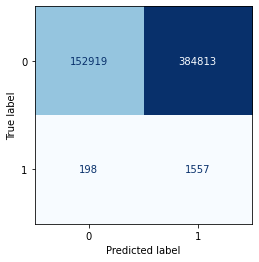

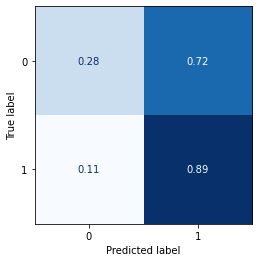

In [7]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_SimpleSMOTEETOMEK_1nl_prob = (model_simple_SMOTETomek_1n_1l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_SimpleSMOTEETOMEK_1nl_prob = (model_simple_SMOTETomek_1n_1l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple_SMOTETomek_1n_1l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_simple_SMOTETomek_1n_1l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_SimpleSMOTEETOMEK_1nl_prob))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_SimpleSMOTEETOMEK_1nl_prob))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_SimpleSMOTEETOMEK_1nl_prob)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_SimpleSMOTEETOMEK_1nl_prob,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 1)                 9         
_________________________________________________________________
dropout (Dropout)            (None, 1)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 2         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________



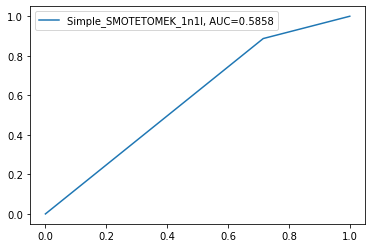

In [8]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_SimpleSMOTEETOMEK_1nl = (model_simple_SMOTETomek_1n_1l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_SimpleSMOTEETOMEK_1nl = (model_simple_SMOTETomek_1n_1l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple_SMOTETomek_1n_1l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_SimpleSMOTEETOMEK_1nl)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_SimpleSMOTEETOMEK_1nl), 4)
plt.plot(fpr,tpr,label="Simple_SMOTETOMEK_1n1l, AUC="+str(auc))





#add legend
plt.legend()

In [10]:
##### Step 5 - Specify the structure of a Neural Network
model_complexSMOTETomek_523n_4l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpoint2'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model_complexSMOTETomek_523n_4l.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_complexSMOTETomek_523n_4l.fit(X_training_smtmek, Y_traning_smtmek, epochs = 7 ,callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
Epoch 1/7
8508348/8508348 [==============================] - 5203s 612us/sample - loss: 0.4205 - accuracy: 0.7960 - val_loss: 0.4329 - val_accuracy: 0.8055
Epoch 2/7
8508348/8508348 [==============================] - 4941s 581us/sample - loss: 0.4117 - accuracy: 0.8013 - val_loss: 0.5264 - val_accuracy: 0.7827
Epoch 3/7
8508348/8508348 [==============================] - 4872s 573us/sample - loss: 0.4131 - accuracy: 0.8020 - val_loss: 0.3791 - val_accuracy: 0.8037
Epoch 4/7
8508348/8508348 [==============================] - 4988s 586us/sample - loss: 0.4140 - accuracy: 0.8014 - val_loss: 0.4598 - val_accuracy: 0.7689
Epoch 5/7
8508348/8508348 [==============================] - 5008s 589us/sample - loss: 0.4126 - accuracy: 0.8029 - val_loss: 0.4699 - val_accuracy: 0.7843
Epoch 6/7
8508348/8508348 [==============================] - 4884s 574us/sample - loss: 0.4136 - accuracy: 0.8030 - val_loss: 0.4185 - val_accuracy: 0.8316
Epoch 7/7
8

In [13]:
model_complexSMOTETomek_523n_4l.save('model_complexSMOTETomek_523n_4l')
model_complexSMOTETomek_523n_4l.save('model_complexSMOTETomek_523n_4l.h5')

INFO:tensorflow:Assets written to: model_complexSMOTETomek_523n_4l/assets



-------------------- Model Summary --------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 512)               262656    
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_______________________________________________________________

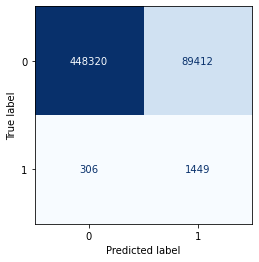

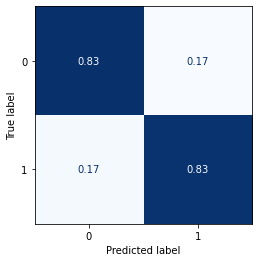

In [11]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complexSMOTETomek_523n_4l_prob = (model_complexSMOTETomek_523n_4l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_complexSMOTETomek_523n_4l_prob = (model_complexSMOTETomek_523n_4l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complexSMOTETomek_523n_4l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_complexSMOTETomek_523n_4l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_complexSMOTETomek_523n_4l_prob))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_complexSMOTETomek_523n_4l_prob))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complexSMOTETomek_523n_4l_prob)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complexSMOTETomek_523n_4l_prob,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 512)               262656    
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_______________________________________________________________

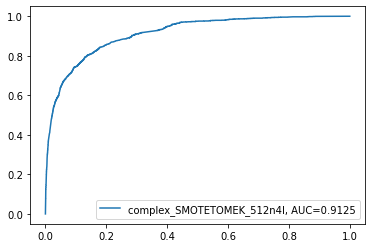

In [12]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complexSMOTETomek_523n_4l = (model_complexSMOTETomek_523n_4l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complexSMOTETomek_523n_4l = (model_complexSMOTETomek_523n_4l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complexSMOTETomek_523n_4l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complexSMOTETomek_523n_4l)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complexSMOTETomek_523n_4l), 4)
plt.plot(fpr,tpr,label="complex_SMOTETOMEK_512n4l, AUC="+str(auc))





#add legend
plt.legend()

In [5]:
##### Step 5 - Specify the structure of a Neural Network
model_complexSMOTETomek_256n_4l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer2'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer3'),
    tf.keras.layers.Dense(256, activation='tanh', name='Hidden-Layer4'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpointcomplexSMOTETomek_256n_4l'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='max',
    save_best_only=True)


model_complexSMOTETomek_256n_4l.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_complexSMOTETomek_256n_4l.fit(X_training_smtmek, Y_traning_smtmek, epochs = 7 ,callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


2022-07-08 15:30:17.628647: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 15:30:17.631686: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 8508348 samples, validate on 688402 samples
Epoch 1/7
8508348/8508348 [==============================] - 2027s 238us/sample - loss: 0.4020 - accuracy: 0.8066 - val_loss: 0.4095 - val_accuracy: 0.8231
Epoch 2/7
8508348/8508348 [==============================] - 1977s 232us/sample - loss: 0.3900 - accuracy: 0.8140 - val_loss: 0.3589 - val_accuracy: 0.8630
Epoch 3/7
8508348/8508348 [==============================] - 2056s 242us/sample - loss: 0.3878 - accuracy: 0.8153 - val_loss: 0.4376 - val_accuracy: 0.7716
Epoch 4/7
8508348/8508348 [==============================] - 2013s 237us/sample - loss: 0.3881 - accuracy: 0.8150 - val_loss: 0.4615 - val_accuracy: 0.7611
Epoch 5/7
8508348/8508348 [==============================] - 2918s 343us/sample - loss: 0.3905 - accuracy: 0.8138 - val_loss: 0.3809 - val_accuracy: 0.8126
Epoch 6/7
8508348/8508348 [==============================] - 3388s 398us/sample - loss: 0.3920 - accuracy: 0.8134 - val_loss: 0.3922 - val_accuracy: 0.8140
Epoch 7/7
8

In [6]:
model_complexSMOTETomek_256n_4l.save('model_complexSMOTETomek_256n_4l')
model_complexSMOTETomek_256n_4l.save('model_complexSMOTETomek_256n_4l.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2022-07-08 20:13:48.859440: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_complexSMOTETomek_256n_4l/assets



-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 256)               2304      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________

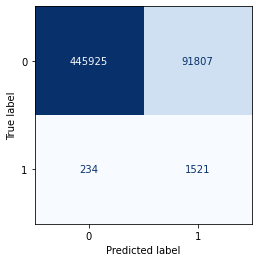

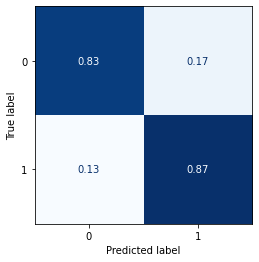

In [7]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_SMOTETomek_4l_256n = (model_complexSMOTETomek_256n_4l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_complx_SMOTETomek_4l_256n = (model_complexSMOTETomek_256n_4l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complexSMOTETomek_256n_4l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_complexSMOTETomek_256n_4l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_complx_SMOTETomek_4l_256n))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_complx_SMOTETomek_4l_256n))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complx_SMOTETomek_4l_256n)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complx_SMOTETomek_4l_256n,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 256)               2304      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________

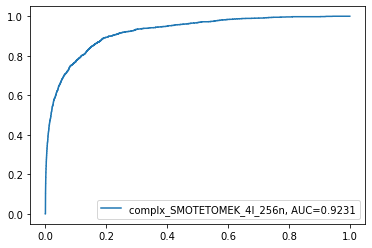

In [8]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_SMOTETomek_4l_256n_prob = (model_complexSMOTETomek_256n_4l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complx_SMOTETomek_4l_256n_prob = (model_complexSMOTETomek_256n_4l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complexSMOTETomek_256n_4l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_SMOTETomek_4l_256n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_SMOTETomek_4l_256n_prob), 4)
plt.plot(fpr,tpr,label="complx_SMOTETOMEK_4l_256n, AUC="+str(auc))





#add legend
plt.legend()

In [9]:
##### Step 5 - Specify the structure of a Neural Network
model_simple_SMOTETomek_8n_1l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(8, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpoint8nSMOTETOMEK'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model_simple_SMOTETomek_8n_1l.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_simple_SMOTETomek_8n_1l.fit(X_training_smtmek, Y_traning_smtmek, epochs = 25 ,callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
Epoch 1/25
8508348/8508348 [==============================] - 320s 38us/sample - loss: 0.5142 - accuracy: 0.7406 - val_loss: 0.5036 - val_accuracy: 0.8363
Epoch 2/25
8508348/8508348 [==============================] - 646s 76us/sample - loss: 0.4938 - accuracy: 0.7543 - val_loss: 0.4569 - val_accuracy: 0.8438
Epoch 3/25
8508348/8508348 [==============================] - 1636s 192us/sample - loss: 0.4893 - accuracy: 0.7578 - val_loss: 0.4456 - val_accuracy: 0.8265
Epoch 4/25
8508348/8508348 [==============================] - 432s 51us/sample - loss: 0.4891 - accuracy: 0.7580 - val_loss: 0.4362 - val_accuracy: 0.7421
Epoch 5/25
8508348/8508348 [==============================] - 564s 66us/sample - loss: 0.4889 - accuracy: 0.7581 - val_loss: 0.4935 - val_accuracy: 0.6820
Epoch 6/25
8508348/8508348 [==============================] - 318s 37us/sample - loss: 0.4890 - accuracy: 0.7583 - val_loss: 0.4372 - val_accuracy: 0.8634
Epoch 7/25
8508

In [10]:
model_simple_SMOTETomek_8n_1l.save('model_simple_SMOTETomek_8n_1l')
model_simple_SMOTETomek_8n_1l.save('model_simple_SMOTETomek_8n_1l.h5')

INFO:tensorflow:Assets written to: model_simple_SMOTETomek_8n_1l/assets



-------------------- Model Summary --------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_1
Layer:  Hidden-Layer1
Layer:  dropout_1
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
       

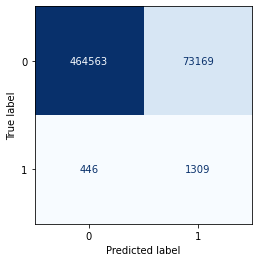

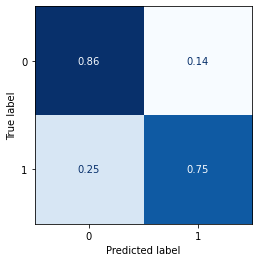

In [11]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTETomek_8n_1l = (model_simple_SMOTETomek_8n_1l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_simple_SMOTETomek_8n_1l = (model_simple_SMOTETomek_8n_1l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple_SMOTETomek_8n_1l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_simple_SMOTETomek_8n_1l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_simple_SMOTETomek_8n_1l))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_simple_SMOTETomek_8n_1l))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple_SMOTETomek_8n_1l)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple_SMOTETomek_8n_1l,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________



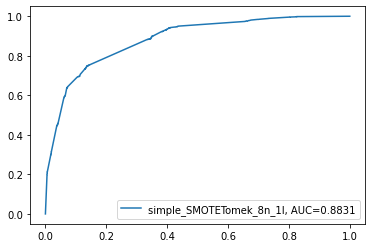

In [12]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTETomek_8n_1l_prob = (model_simple_SMOTETomek_8n_1l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_simple_SMOTETomek_8n_1l_prob = (model_simple_SMOTETomek_8n_1l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple_SMOTETomek_8n_1l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple_SMOTETomek_8n_1l_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple_SMOTETomek_8n_1l_prob), 4)
plt.plot(fpr,tpr,label="simple_SMOTETomek_8n_1l, AUC="+str(auc))





#add legend
plt.legend()

In [14]:
##### Step 5 - Specify the structure of a Neural Network
model_simple_SMOTETomek_512n_1l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='tanh', name='Hidden-Layer1'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid', name='Output-Layer')
])

checkpoint_filepath = '/tmp/checkpoint512nSMOTETOMEK'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model_simple_SMOTETomek_512n_1l.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

model_simple_SMOTETomek_512n_1l.fit(X_training_smtmek, Y_traning_smtmek, epochs = 10 ,callbacks=[model_checkpoint_callback],  validation_data=(x_validation, y_validation))#*********more epochs = 5


Train on 8508348 samples, validate on 688402 samples
Epoch 1/10
8508348/8508348 [==============================] - 2310s 271us/sample - loss: 0.4077 - accuracy: 0.8050 - val_loss: 0.4802 - val_accuracy: 0.7541
Epoch 2/10
8508348/8508348 [==============================] - 1495s 176us/sample - loss: 0.3945 - accuracy: 0.8131 - val_loss: 0.2906 - val_accuracy: 0.8796
Epoch 3/10
8508348/8508348 [==============================] - 2108s 248us/sample - loss: 0.3909 - accuracy: 0.8148 - val_loss: 0.3861 - val_accuracy: 0.8181
Epoch 4/10
8508348/8508348 [==============================] - 1940s 228us/sample - loss: 0.3893 - accuracy: 0.8157 - val_loss: 0.4530 - val_accuracy: 0.7740
Epoch 5/10
8508348/8508348 [==============================] - 1706s 201us/sample - loss: 0.3877 - accuracy: 0.8167 - val_loss: 0.2769 - val_accuracy: 0.8898
Epoch 6/10
8508348/8508348 [==============================] - 1712s 201us/sample - loss: 0.3864 - accuracy: 0.8174 - val_loss: 0.3365 - val_accuracy: 0.8492
Epoch

In [15]:
model_simple_SMOTETomek_512n_1l.save('model_simple_SMOTETomek_512n_1l')
model_simple_SMOTETomek_512n_1l.save('model_simple_SMOTETomek_512n_1l.h5')

INFO:tensorflow:Assets written to: model_simple_SMOTETomek_512n_1l/assets


In [ ]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTETomek_512n_1l = (model_simple_SMOTETomek_512n_1l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_simple_SMOTETomek_512n_1l = (model_simple_SMOTETomek_512n_1l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple_SMOTETomek_512n_1l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_simple_SMOTETomek_512n_1l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_simple_SMOTETomek_512n_1l))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_simple_SMOTETomek_512n_1l))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple_SMOTETomek_512n_1l)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple_SMOTETomek_512n_1l,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_3
Layer:  Hidden-Layer1
Layer:  dropout_3
Layer:  Output-Layer

---------- Evaluation on Training Data ----------


In [ ]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTETomek_512n_1l_prob = (model_simple_SMOTETomek_512n_1l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_simple_SMOTETomek_512n_1l_prob = (model_simple_SMOTETomek_512n_1l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple_SMOTETomek_512n_1l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple_SMOTETomek_512n_1l_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple_SMOTETomek_512n_1l_prob), 4)
plt.plot(fpr,tpr,label="simple_SMOTETomek_512n_1l, AUC="+str(auc))





#add legend
plt.legend()

In [4]:
complex_SMOTETOMEK_512n_1l = tf.keras.models.load_model('model_simple_SMOTETomek_512n_1l')

# Check its architecture
complex_SMOTETOMEK_512n_1l.summary()

2022-07-09 11:11:32.690266: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-09 11:11:32.693580: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________



-------------------- Model Summary --------------------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  flatten_3
Layer:  Hidden-Layer1
Layer:  dropout_3
Layer:  Output-Layer

---------- Evaluation on Training Data ----------
 

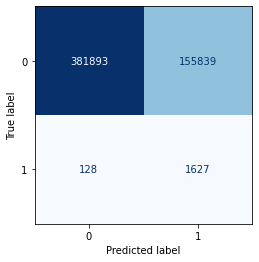

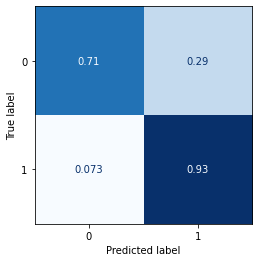

In [5]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTETomek_512n_1l = (complex_SMOTETOMEK_512n_1l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_simple_SMOTETomek_512n_1l = (complex_SMOTETOMEK_512n_1l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
complex_SMOTETOMEK_512n_1l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in complex_SMOTETOMEK_512n_1l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_simple_SMOTETomek_512n_1l))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_simple_SMOTETomek_512n_1l))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple_SMOTETomek_512n_1l)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple_SMOTETomek_512n_1l,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


-------------------- Model Summary --------------------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 512)               4608      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 513       
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________



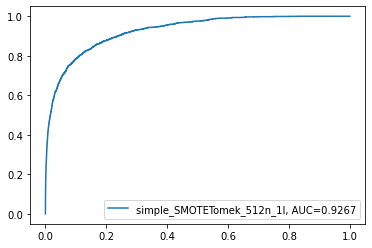

In [6]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTETomek_512n_1l_prob = (complex_SMOTETOMEK_512n_1l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_simple_SMOTETomek_512n_1l_prob = (complex_SMOTETOMEK_512n_1l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
complex_SMOTETOMEK_512n_1l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple_SMOTETomek_512n_1l_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple_SMOTETomek_512n_1l_prob), 4)
plt.plot(fpr,tpr,label="simple_SMOTETomek_512n_1l, AUC="+str(auc))





#add legend
plt.legend()

In [7]:
plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple8_SMOTEENN_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple8_SMOTEENN_prob), 4)
plt.plot(fpr,tpr,label="simple_model_SMOTEEEN ,8n,1l, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_SMOTEENN_1l_512n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_SMOTEENN_1l_512n_prob), 4)
plt.plot(fpr,tpr,label="complex_model_SMOTEEEN 512n,1l, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_SMOTEENN_4l_256n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_SMOTEENN_4l_256n_prob), 4)
plt.plot(fpr,tpr,label="complex_model_SMOTEEEN,256n,4l,  AUC="+str(auc))



#add legend
plt.legend()

NameError: name 'pred_labels_te_simple8_SMOTEENN_prob' is not defined

<Figure size 432x288 with 0 Axes>

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________

-------------------- Model Summary --------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)       

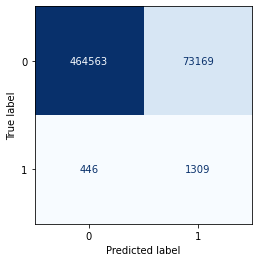

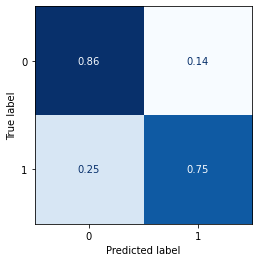

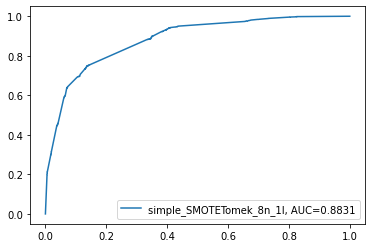

In [10]:
model_simple_SMOTETomek_8n_1l = tf.keras.models.load_model('model_simple_SMOTETomek_8n_1l')

# Check its architecture
model_simple_SMOTETomek_8n_1l.summary()

##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTETomek_8n_1l = (model_simple_SMOTETomek_8n_1l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_simple_SMOTETomek_8n_1l = (model_simple_SMOTETomek_8n_1l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple_SMOTETomek_8n_1l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_simple_SMOTETomek_8n_1l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_simple_SMOTETomek_8n_1l))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_simple_SMOTETomek_8n_1l))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple_SMOTETomek_8n_1l)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_simple_SMOTETomek_8n_1l,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)

##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_simple_SMOTETomek_8n_1l_prob = (model_simple_SMOTETomek_8n_1l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_simple_SMOTETomek_8n_1l_prob = (model_simple_SMOTETomek_8n_1l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_simple_SMOTETomek_8n_1l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple_SMOTETomek_8n_1l_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple_SMOTETomek_8n_1l_prob), 4)
plt.plot(fpr,tpr,label="simple_SMOTETomek_8n_1l, AUC="+str(auc))





#add legend
plt.legend()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
Hidden-Layer1 (Dense)        (None, 256)               2304      
_________________________________________________________________
Hidden-Layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
Hidden-Layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 2

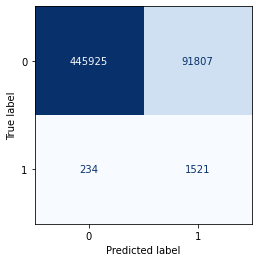

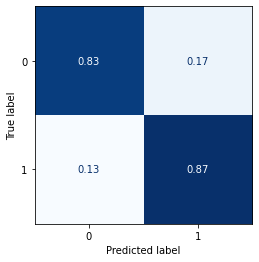

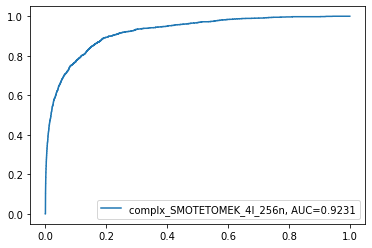

In [11]:
model_complexSMOTETomek_256n_4l = tf.keras.models.load_model('model_complexSMOTETomek_256n_4l')

# Check its architecture
model_complexSMOTETomek_256n_4l.summary()
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_SMOTETomek_4l_256n = (model_complexSMOTETomek_256n_4l.predict(x_training)> 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te_complx_SMOTETomek_4l_256n = (model_complexSMOTETomek_256n_4l.predict(x_test)> 0.5).astype(int)
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complexSMOTETomek_256n_4l.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model_complexSMOTETomek_256n_4l.layers:
    print("Layer: ", layer.name) # print layer name
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_training, pred_labels_tr_complx_SMOTETomek_4l_256n))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te_complx_SMOTETomek_4l_256n))
print("")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complx_SMOTETomek_4l_256n)).plot(colorbar=False,cmap=plt.cm.Blues)
ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels_te_complx_SMOTETomek_4l_256n,normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr_complx_SMOTETomek_4l_256n_prob = (model_complexSMOTETomek_256n_4l.predict(x_training))
# Predict class labels on a test data
pred_labels_te_complx_SMOTETomek_4l_256n_prob = (model_complexSMOTETomek_256n_4l.predict(x_test))
#> 0.01).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model_complexSMOTETomek_256n_4l.summary() # print model summary
print("")


from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_SMOTETomek_4l_256n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_SMOTETomek_4l_256n_prob), 4)
plt.plot(fpr,tpr,label="complx_SMOTETOMEK_4l_256n, AUC="+str(auc))





#add legend
plt.legend()

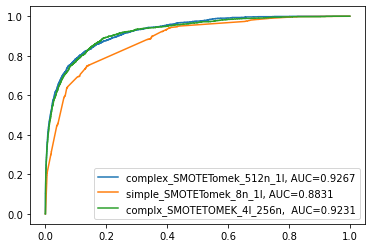

In [12]:
plt.figure(0).clf()


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple_SMOTETomek_512n_1l_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple_SMOTETomek_512n_1l_prob), 4)
plt.plot(fpr,tpr,label="complex_SMOTETomek_512n_1l, AUC="+str(auc))


fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_simple_SMOTETomek_8n_1l_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_simple_SMOTETomek_8n_1l_prob), 4)
plt.plot(fpr,tpr,label="simple_SMOTETomek_8n_1l, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, pred_labels_te_complx_SMOTETomek_4l_256n_prob)
auc = round(metrics.roc_auc_score(y_test, pred_labels_te_complx_SMOTETomek_4l_256n_prob), 4)
plt.plot(fpr,tpr,label="complx_SMOTETOMEK_4l_256n,  AUC="+str(auc))



#add legend
plt.legend()